In [200]:
import librosa
import soundfile
import os, glob
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as lr

In [201]:

def extract_feature(file_name,signal_wave,emotion):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        #print(X.shape)
        signal_wave.append([X,emotion])
        sample_rate=sound_file.samplerate
        #print(sample_rate)
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate).T, axis=0)
        result=np.hstack((result, mfccs[2:-2]))
        # print("mfccs ",mfccs.shape,sample_rate)
        
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        # print("chroma ",chroma.shape,sample_rate)
        mel=np.mean(librosa.feature.zero_crossing_rate(X).T,axis=0)
        # print("mel ",mel.shape,sample_rate)
        result=np.hstack((result, mel))
    #print(result.shape)
    return result

In [202]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

emotionstonumber={
    'fearful':0,
    'angry':1,
    'sad':2,
    'happy':3,
    'surprised':4
}


observed_emotions=['happy', 'fearful','sad','angry','surprised']

In [203]:
signal_wave=[]

def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\Dell\\Desktop\\DM project\\speech_emotion\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file,signal_wave,emotion)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [204]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,) 16000
mel  (1,

In [205]:
ran=[random.randrange(0,719) for i in range(5)] 

In [206]:
print(x_train.shape, x_test.shape,len(signal_wave))

(720, 29) (240, 29) 960


[-13.73218822  -4.27515602 -12.95633984  -3.56712675 -13.134902
 -10.50723362  -8.9044714   -4.16210794  -6.58355331  -6.88676786
  -6.12121201  -8.39260769  -5.05379295  -2.16321731   2.71561456
   4.77989483   0.4525359    0.46599233   0.49011695   0.49154177]


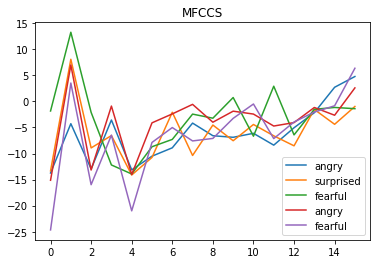

In [207]:
plt.title("MFCCS")
plt.plot(x_train[ran[0]][0:16],label=y_train[ran[0]])
plt.plot(x_train[ran[1]][0:16],label=y_train[ran[1]])
plt.plot(x_train[ran[2]][0:16],label=y_train[ran[2]])
plt.plot(x_train[ran[3]][0:16],label=y_train[ran[3]])
plt.plot(x_train[ran[4]][0:16],label=y_train[ran[4]])
plt.legend()
print(x_train[ran[0]][:20])

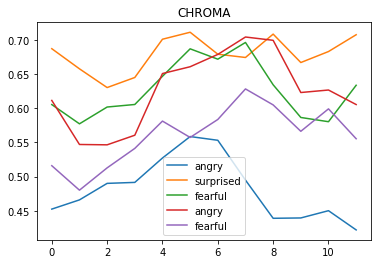

In [208]:
plt.title("CHROMA")
plt.plot(x_train[ran[0]][16:28],label=y_train[ran[0]])
plt.plot(x_train[ran[1]][16:28],label=y_train[ran[1]])
plt.plot(x_train[ran[2]][16:28],label=y_train[ran[2]])
plt.plot(x_train[ran[3]][16:28],label=y_train[ran[3]])
plt.plot(x_train[ran[4]][16:28],label=y_train[ran[4]])
plt.legend()

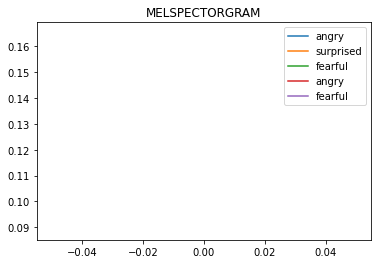

In [209]:
plt.title("MELSPECTORGRAM")
plt.plot(x_train[ran[0]][28:],label=y_train[ran[0]])
plt.plot(x_train[ran[1]][28:],label=y_train[ran[1]])
plt.plot(x_train[ran[2]][28:],label=y_train[ran[2]])
plt.plot(x_train[ran[3]][28:],label=y_train[ran[3]])
plt.plot(x_train[ran[4]][28:],label=y_train[ran[4]])
plt.legend()

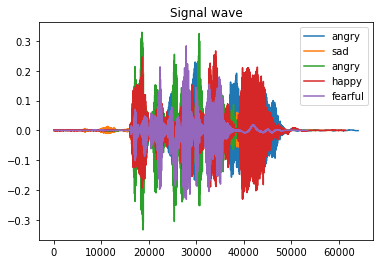

In [210]:
plt.title('Signal wave')
plt.plot(signal_wave[ran[0]][0],label=signal_wave[ran[0]][1])
plt.plot(signal_wave[ran[1]][0],label=signal_wave[ran[1]][1])
plt.plot(signal_wave[ran[2]][0],label=signal_wave[ran[2]][1])
plt.plot(signal_wave[ran[3]][0],label=signal_wave[ran[3]][1])
plt.plot(signal_wave[ran[4]][0],label=signal_wave[ran[4]][1])
plt.legend()

In [211]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(400,) ,learning_rate='adaptive', max_iter=1000)

In [212]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(400,),
              learning_rate='adaptive', max_iter=1000)

In [213]:
y_pred=model.predict(x_test)

In [214]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 69.58%


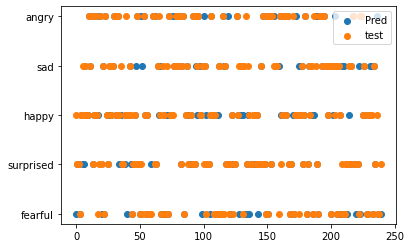

In [215]:
l=[i for i in range(len(y_pred))]
plt.scatter(l,y_pred,label='Pred')
plt.scatter(l,y_test,label='test')
plt.legend()



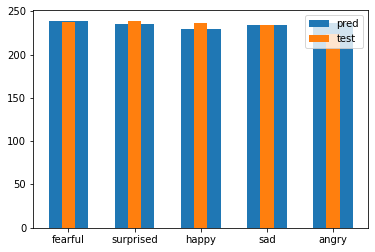

In [216]:
l=[i for i in range(len(y_pred))]
plt.bar(y_pred,l,width=0.6,label="pred")
plt.bar(y_test,l,width=0.2,label="test")
plt.legend()


In [217]:
m=confusion_matrix(y_test,y_pred)
print(m)

[[36  2  4  1  0]
 [ 0 29  5  6  3]
 [ 4  4 36  4  6]
 [ 2  6 10 30  1]
 [ 5  6  2  2 36]]


<AxesSubplot:>

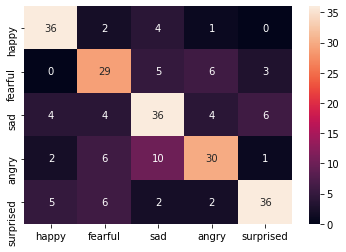

In [218]:
import seaborn as sn
sn.heatmap(m, annot=True,xticklabels=observed_emotions,yticklabels=observed_emotions)

In [219]:
import heapq

In [220]:
angry=[]
fear=[]
sad=[]
happy=[]
surprise=[]

In [221]:
for i in range(len(y_pred)):
    if([y_pred[i]]=='angry'):
        angry.append(x_test[i])
    if([y_pred[i]]=='sad'):
        sad.append(x_test[i])
    if([y_pred[i]]=='fearful'):
        fear.append(x_test[i])
    if([y_pred[i]]=='happy'):
        happy.append(x_test[i])
    if([y_pred[i]]=='surprised'):
        surprise.append(x_test[i])
    

In [222]:
priorty=[]

for i in range(len(y_pred)):
    heapq.heappush(priorty,(emotionstonumber[y_pred[i]],y_pred[i],i+1))

In [223]:
len(priorty)

240

In [224]:
print(priorty[:50])

[(0, 'fearful', 1), (0, 'fearful', 4), (0, 'fearful', 51), (0, 'fearful', 68), (0, 'fearful', 21), (0, 'fearful', 100), (0, 'fearful', 56), (0, 'fearful', 69), (0, 'fearful', 73), (0, 'fearful', 41), (0, 'fearful', 23), (0, 'fearful', 201), (0, 'fearful', 106), (0, 'fearful', 58), (0, 'fearful', 122), (0, 'fearful', 129), (0, 'fearful', 71), (0, 'fearful', 144), (0, 'fearful', 152), (1, 'angry', 11), (0, 'fearful', 86), (0, 'fearful', 45), (0, 'fearful', 187), (1, 'angry', 97), (0, 'fearful', 206), (0, 'fearful', 209), (0, 'fearful', 111), (0, 'fearful', 114), (0, 'fearful', 59), (0, 'fearful', 240), (1, 'angry', 62), (2, 'sad', 8), (0, 'fearful', 133), (0, 'fearful', 137), (1, 'angry', 16), (1, 'angry', 19), (0, 'fearful', 150), (1, 'angry', 77), (1, 'angry', 79), (1, 'angry', 161), (1, 'angry', 82), (0, 'fearful', 169), (0, 'fearful', 172), (2, 'sad', 88), (0, 'fearful', 182), (1, 'angry', 93), (0, 'fearful', 191), (1, 'angry', 192), (1, 'angry', 196), (1, 'angry', 24)]
